# OPTICS clustering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS


## Configuration parameters

In [2]:
# Configuration options
num_samples_total = 100
cluster_centers = [[3,3], [3,5], [5,5]]
num_classes = len(cluster_centers)
epsilon = 2.0
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

## Creating dataset

In [3]:
# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)


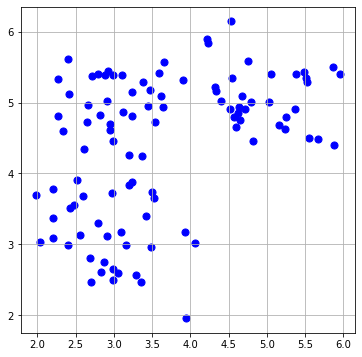

In [4]:
plt.rcParams["figure.figsize"] = (6,6)   
plt.grid()
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue');

## Compute OPTICS

In [5]:
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)

## Statistics

In [6]:
labels = db.labels_
number_of_clusters = len(np.unique(labels) )
number_of_noise_points = np.sum(np.array(labels) == -1, axis=0)

print('Estimated number of clusters: %d' % number_of_clusters)
print('Estimated number of noise points: %d' % number_of_noise_points)

Estimated number of clusters: 2
Estimated number of noise points: 69


## Predicting

In [7]:
# Predict the cluster for all the samples
P = db.fit_predict(X)

In [8]:
labels = db.labels_
print(labels)

[-1  0 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1  0 -1  0 -1 -1
 -1 -1  0  0  0 -1 -1  0  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1  0  0  0 -1 -1  0  0  0 -1 -1  0  0 -1 -1 -1  0 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0]


## Cluster visualization

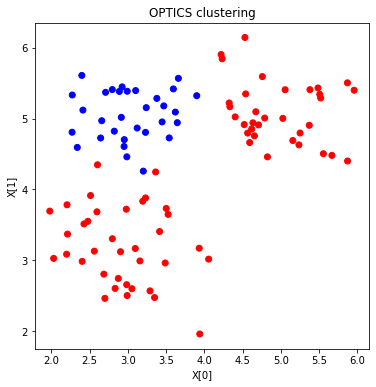

In [9]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#ff0000' if x == -1 else '#00ff00' if x == 1 else '#0000ff', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('OPTICS clustering')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

## Reachability plot

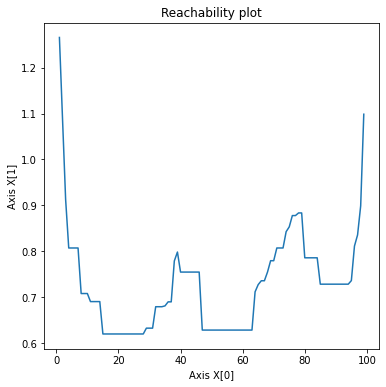

In [10]:
# Generate reachability plot
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()